## Basic Gaussian Elimination Algorithm

Gaussian elimination is a method for solving matrix equations of the form Ax=b

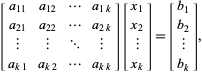

(1) To perform Gaussian elimination starting with the system of equations

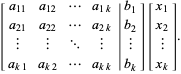

(3) Here, the column vector in the variables X is carried along for labeling the matrix rows.
Now, perform elementary row operations to put the augmented matrix into the upper triangular form

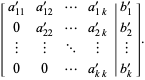

(4) Solve the equation of the th row for , then substitute back into the equation of the (k-1)st row to
obtain a solution for Xk-1, etc., according to the formula

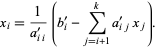

In [1]:
import numpy as np
import sys
from sympy import *
init_printing()

In [3]:
def basic_Gaussian_Elimination(s,b):
    n = len(s)
    
# Merging coefficients and constants
    a = np.zeros((n,n+1))
    
    for i in range (n):
        for j in range(n):
            a[i][j] = s[i][j]
        a[i][j+1] = b[i]
        

# Applying Gauss Elimination
    for i in range(n):
        if a[i][i] == 0.0:
            sys.exit('Divide by zero detected!')
        
        for j in range(i+1, n):
            ratio = a[j][i]/a[i][i]
        
            for k in range(n+1):
                a[j][k] = a[j][k] - ratio * a[i][k]

    
# Back Substitution
    x = np.zeros(n)
    x[n-1] = a[n-1][n]/a[n-1][n-1]
    for i in range(n-2,-1,-1):
        x[i] = a[i][n]
        for j in range(i+1,n):
            x[i] = x[i] - a[i][j]*x[j]
        x[i] = x[i]/a[i][i]
        
    return x

In [4]:
s = np.array([[2,1,3],
              [1,1,1],
              [5,1,1]])

b = np.array ([6,3,7])

basic_Gaussian_Elimination(s,b)

array([1., 1., 1.])

# Focus on this system:

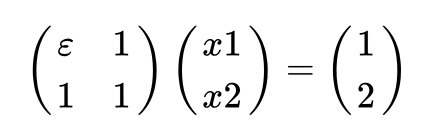

For small positive є, the solution is x1 = x2 = 1.

In [5]:
s = np.array([[1e-5,1],
              [1   ,1]])
b = [1,2]
basic_Gaussian_Elimination(s,b)

array([1.00001, 0.99999])

In [6]:
s = np.array([[1e-10,1],
              [1    ,1]])
b = [1,2]
basic_Gaussian_Elimination(s,b)

array([1.00000008, 1.        ])

In [7]:
s = np.array([[1e-15,1],
              [1    ,1]])
b = [1,2]
basic_Gaussian_Elimination(s,b)

array([0.99920072, 1.        ])

In [8]:
s = np.array([[1e-16,1],
              [1    ,1]])
b = [1,2]
basic_Gaussian_Elimination(s,b)

array([2.22044605, 1.        ])

In [9]:
s = np.array([[1e-17,1],
              [1    ,1]])
b = [1,2]
basic_Gaussian_Elimination(s,b)

array([0., 1.])

In [10]:
s = np.array([[1e-25,1],
              [1    ,1]])
b = [1,2]
basic_Gaussian_Elimination(s,b)

array([0., 1.])

In [11]:
A = Matrix(s)
B = Matrix(b)
soln = A.LUsolve(B)
soln

⎡ 0 ⎤
⎢   ⎥
⎣1.0⎦

# what's happening?

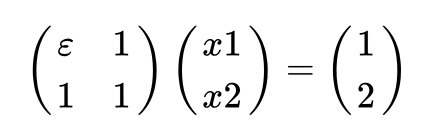


# How Gaussian elimination provides the solution?
elimination:

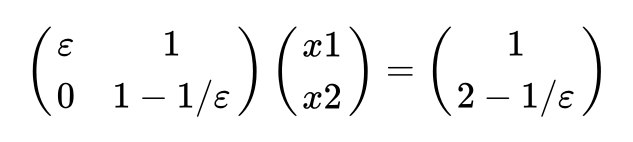


# Solving:
subsituation:

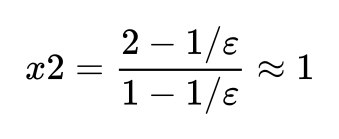

e*x1 + 1*x2 = 1
e*x1 = 1-x2
x1 = (1/e)*(1-x2)
x1 = (1/e)*(1-x2)
x1 = 0

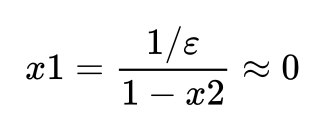

# which for small є leads to x2 ≈ 1 and x1≈0.

# Idea: Switch order of rows:

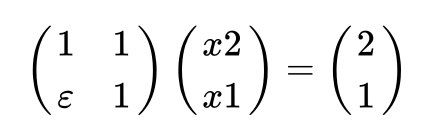

In [12]:
w = np.array([[1,1],
             [1e-10,1]])
c = [2,1]
basic_Gaussian_Elimination(w,c)

array([1., 1.])

In [13]:
w = np.array([[1,1],
             [1e-17,1]])
c = [2,1]
basic_Gaussian_Elimination(w,c)

array([1., 1.])

In [14]:
w = np.array([[1,1],
             [1e-25,1]])
c = [2,1]
basic_Gaussian_Elimination(w,c)

array([1., 1.])

In [15]:
w = np.array([[1,1],
             [1e-45,1]])
c = [2,1]
basic_Gaussian_Elimination(w,c)

array([1., 1.])

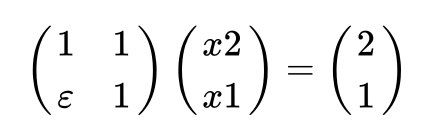

elimination:

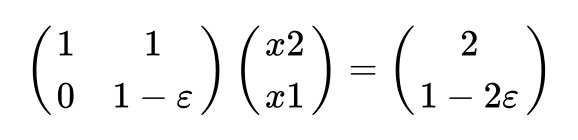

subsituation:

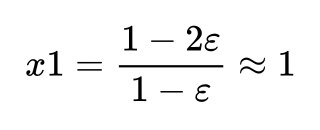

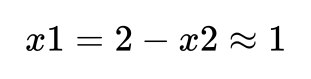

# Partial Pivoting:

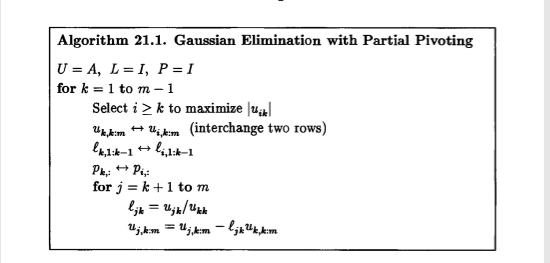

In [ ]:

def GEPP(A, b, doPricing = True):
    '''
    Gaussian elimination with partial pivoting.
    
    input: A is an n x n numpy matrix
           b is an n x 1 numpy array
    output: x is the solution of Ax=b 
            with the entries permuted in 
            accordance with the pivoting 
            done by the algorithm
    post-condition: A and b have been modified.
    '''
    n = len(A)
    if b.size != n:
        raise ValueError("Invalid argument: incompatible sizes between"+
                         "A & b.", b.size, n)
    # k represents the current pivot row. Since GE traverses the matrix in the 
    # upper right triangle, we also use k for indicating the k-th diagonal 
    # column index.
    
    # Elimination
    for k in range(n-1):
        if doPricing:
            # Pivot
            maxindex = abs(A[k:,k]).argmax() + k
            if A[maxindex, k] == 0:
                raise ValueError("Matrix is singular.")
            # Swap
            if maxindex != k:
                A[[k,maxindex]] = A[[maxindex, k]]
                b[[k,maxindex]] = b[[maxindex, k]]
        else:
            if A[k, k] == 0:
                raise ValueError("Pivot element is zero. Try setting doPricing to True.")
        #Eliminate
        for row in range(k+1, n):
            multiplier = A[row,k]/A[k,k]
            A[row, k:] = A[row, k:] - multiplier*A[k, k:]
            b[row] = b[row] - multiplier*b[k]
    # Back Substitution
    x = np.zeros(n)
    for k in range(n-1, -1, -1):
        x[k] = (b[k] - np.dot(A[k,k+1:],x[k+1:]))/A[k,k]
    return x

In [ ]:
s = np.array([[1e-20,1],
            [1,1]])
b = np.array([1,2])
GEPP(s,b)

In [ ]:
s = np.array([[1e-25,1],
            [1,1]])
b = np.array([1,2])
GEPP(s,b)

In [ ]:
s = np.array([[1e-45,1],
            [1,1]])
b = np.array([1,2])
GEPP(s,b)

In [ ]:
def dd(X):
    D = np.diag(np.abs(X)) # Find diagonal coefficients
    S = np.sum(np.abs(X), axis=1) - D # Find row sum without diagonal
    if np.all(D > S):
        print ('matrix is diagonally dominant')
    else:
        print ('NOT diagonally dominant')
    return